In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import calendar
import folium
import geopandas as gpd
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

import math
import folium
import datetime
from os import listdir
from os.path import isfile, join

from matplotlib import gridspec
from matplotlib.backends.backend_pdf import PdfPages

import statsmodels.api as sm
from factor_analyzer import FactorAnalyzer

In [2]:
variaz = pd.read_csv('quake_data/variaz_phone.csv')
variaz = variaz[variaz['Cratere Centro Italia 2016'] == 1]
variaz

,Comune,Cratere Centro Italia 2016,Variaz,Variaz_init,Variaz_end
2,Accumoli,1,-50.161357,-10.301179,-62.678257
3,Acquacanina,1,-34.800125,-9.641580,-42.700415
6,Acquasanta Terme,1,-20.581043,-9.636775,-24.017764
16,Amandola,1,-16.146012,-2.843389,-20.323303
17,Amatrice,1,-33.683988,-16.591377,-39.051413
...,...,...,...,...,...
638,Ussita,1,-63.773951,-31.169307,-74.012467
643,Valle Castellana,1,-13.247536,-7.710898,-14.986153
645,Vallo di Nera,1,-15.279045,-11.654111,-16.417347
650,Venarotta,1,-12.366800,-3.825055,-15.049081


In [3]:
distance = pd.read_csv('quake_data/distance_from_epicenter.csv', sep=',')
variaz = variaz.merge(distance)
variaz.head()

,Comune,Cratere Centro Italia 2016,Variaz,Variaz_init,Variaz_end,Distance_from_epicenter
0,Accumoli,1,-50.161357,-10.301179,-62.678257,0.000000
1,Acquacanina,1,-34.800125,-9.641580,-42.700415,14.633192
2,Acquasanta Terme,1,-20.581043,-9.636775,-24.017764,15.157389
3,Amandola,1,-16.146012,-2.843389,-20.323303,18.427903
4,Amatrice,1,-33.683988,-16.591377,-39.051413,8.649987


In [4]:
imprese_ateco_wide = pd.read_csv('quake_data/imprese_ateco_wide.csv', sep=',')
ateco_names = list(imprese_ateco_wide.columns)[1:]
imprese_ateco_wide.head(2)

,Comune,AGRICOLTURE,REAL ESTATE,HOSPITALITY,MANUFACTURING,TECH SERVICES,WHOLE/RETAIL SALES,CONSTRUCTIONS,BUSINESS SUPPORT SERVICES,COMMUNICATION AND INFORMATION SERV.,LOGISTICS
0,Abbateggio,0.0,0.0,0.24878,0.0,0.0,0.000000,0.75122,0.000000,0.0,0.0
1,Acciano,0.0,0.0,0.00000,0.0,0.0,0.771084,0.00000,0.228916,0.0,0.0


In [5]:
xy = pd.merge(variaz, imprese_ateco_wide, how='inner', on='Comune').fillna(0)
xy = xy.loc[xy['Variaz']<50,:]
xy['Distance_from_epicenter']=(xy['Distance_from_epicenter']-xy['Distance_from_epicenter'].mean())/xy['Distance_from_epicenter'].std()
xy.columns = ['Comune', 'CRATER', 'MPE', 'MPE_INIT','MPE_END','DISTANCE FROM EPICENTER']+ateco_names
xy.head()

,Comune,CRATER,MPE,MPE_INIT,MPE_END,DISTANCE FROM EPICENTER,AGRICOLTURE,REAL ESTATE,HOSPITALITY,MANUFACTURING,TECH SERVICES,WHOLE/RETAIL SALES,CONSTRUCTIONS,BUSINESS SUPPORT SERVICES,COMMUNICATION AND INFORMATION SERV.,LOGISTICS
0,Accumoli,1,-50.161357,-10.301179,-62.678257,-2.535362,0.301518,0.065076,0.000000,0.000000,0.000000,0.459328,0.000000,0.000000,0.00000,0.174078
1,Acquasanta Terme,1,-20.581043,-9.636775,-24.017764,-1.296596,0.000000,0.001230,0.036241,0.509593,0.001558,0.266809,0.142096,0.003772,0.00000,0.038701
2,Amandola,1,-16.146012,-2.843389,-20.323303,-1.029308,0.006810,0.001479,0.000000,0.363792,0.000973,0.508211,0.024284,0.052070,0.04238,0.000000
3,Amatrice,1,-33.683988,-16.591377,-39.051413,-1.828426,0.019120,0.000000,0.012115,0.043540,0.000000,0.694463,0.228585,0.002177,0.00000,0.000000
4,Antrodoco,1,2.916035,2.454171,3.061070,0.273357,0.000000,0.011003,0.017821,0.359526,0.000000,0.093888,0.489774,0.027987,0.00000,0.000000


In [6]:
alt = pd.read_csv('quake_data/Elab_Altimetrie_DEM.csv',sep=';')
alt = alt.loc[alt['COD_REG'].isin([10,11,12,13]),['NOME','ALT_MIN','MEDIA','MEDIANA']]
alt.columns = ['Comune','ALT_MIN','ALT_MEAN','ALT_MED']
xy = xy.merge(alt)
xy

,Comune,CRATER,MPE,MPE_INIT,MPE_END,DISTANCE FROM EPICENTER,AGRICOLTURE,REAL ESTATE,HOSPITALITY,MANUFACTURING,TECH SERVICES,WHOLE/RETAIL SALES,CONSTRUCTIONS,BUSINESS SUPPORT SERVICES,COMMUNICATION AND INFORMATION SERV.,LOGISTICS,ALT_MIN,ALT_MEAN,ALT_MED
0,Accumoli,1,-50.161357,-10.301179,-62.678257,-2.535362,0.301518,0.065076,0.000000,0.000000,0.000000,0.459328,0.000000,0.000000,0.000000,0.174078,670,1181.8030,1125
1,Acquasanta Terme,1,-20.581043,-9.636775,-24.017764,-1.296596,0.000000,0.001230,0.036241,0.509593,0.001558,0.266809,0.142096,0.003772,0.000000,0.038701,242,860.2225,825
2,Amandola,1,-16.146012,-2.843389,-20.323303,-1.029308,0.006810,0.001479,0.000000,0.363792,0.000973,0.508211,0.024284,0.052070,0.042380,0.000000,305,604.1498,543
3,Amatrice,1,-33.683988,-16.591377,-39.051413,-1.828426,0.019120,0.000000,0.012115,0.043540,0.000000,0.694463,0.228585,0.002177,0.000000,0.000000,749,1255.9070,1125
4,Antrodoco,1,2.916035,2.454171,3.061070,0.273357,0.000000,0.011003,0.017821,0.359526,0.000000,0.093888,0.489774,0.027987,0.000000,0.000000,474,1166.0700,1158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,Ussita,1,-63.773951,-31.169307,-74.012467,-1.942280,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,669,1323.2890,1238
118,Valle Castellana,1,-13.247536,-7.710898,-14.986153,-0.786482,0.193731,0.000000,0.000000,0.805242,0.000000,0.000000,0.000000,0.000000,0.001028,0.000000,315,1091.3370,1015
119,Vallo di Nera,1,-15.279045,-11.654111,-16.417347,-0.827839,0.000000,0.000000,0.769489,0.000000,0.000000,0.000000,0.230511,0.000000,0.000000,0.000000,299,781.4977,785
120,Venarotta,1,-12.366800,-3.825055,-15.049081,-0.393745,0.011841,0.000000,0.010150,0.413001,0.000000,0.000000,0.565007,0.000000,0.000000,0.000000,176,432.6170,419


## REGRESSION

In [7]:
xy

,Comune,CRATER,MPE,MPE_INIT,MPE_END,DISTANCE FROM EPICENTER,AGRICOLTURE,REAL ESTATE,HOSPITALITY,MANUFACTURING,TECH SERVICES,WHOLE/RETAIL SALES,CONSTRUCTIONS,BUSINESS SUPPORT SERVICES,COMMUNICATION AND INFORMATION SERV.,LOGISTICS,ALT_MIN,ALT_MEAN,ALT_MED
0,Accumoli,1,-50.161357,-10.301179,-62.678257,-2.535362,0.301518,0.065076,0.000000,0.000000,0.000000,0.459328,0.000000,0.000000,0.000000,0.174078,670,1181.8030,1125
1,Acquasanta Terme,1,-20.581043,-9.636775,-24.017764,-1.296596,0.000000,0.001230,0.036241,0.509593,0.001558,0.266809,0.142096,0.003772,0.000000,0.038701,242,860.2225,825
2,Amandola,1,-16.146012,-2.843389,-20.323303,-1.029308,0.006810,0.001479,0.000000,0.363792,0.000973,0.508211,0.024284,0.052070,0.042380,0.000000,305,604.1498,543
3,Amatrice,1,-33.683988,-16.591377,-39.051413,-1.828426,0.019120,0.000000,0.012115,0.043540,0.000000,0.694463,0.228585,0.002177,0.000000,0.000000,749,1255.9070,1125
4,Antrodoco,1,2.916035,2.454171,3.061070,0.273357,0.000000,0.011003,0.017821,0.359526,0.000000,0.093888,0.489774,0.027987,0.000000,0.000000,474,1166.0700,1158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,Ussita,1,-63.773951,-31.169307,-74.012467,-1.942280,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,669,1323.2890,1238
118,Valle Castellana,1,-13.247536,-7.710898,-14.986153,-0.786482,0.193731,0.000000,0.000000,0.805242,0.000000,0.000000,0.000000,0.000000,0.001028,0.000000,315,1091.3370,1015
119,Vallo di Nera,1,-15.279045,-11.654111,-16.417347,-0.827839,0.000000,0.000000,0.769489,0.000000,0.000000,0.000000,0.230511,0.000000,0.000000,0.000000,299,781.4977,785
120,Venarotta,1,-12.366800,-3.825055,-15.049081,-0.393745,0.011841,0.000000,0.010150,0.413001,0.000000,0.000000,0.565007,0.000000,0.000000,0.000000,176,432.6170,419


In [8]:
    

#feat = ['HOTELS AND RESTAURANTS','FINANCE','MANUFACTURING','BUILDINGS','MINING'] + ['ALT_MED'] #+ ['DISTANCE FROM EPICENTER']
feat = ateco_names + ['ALT_MED'] + ['DISTANCE FROM EPICENTER']
#xy = xy.loc[xy['Comune']!='Sellano',:]
x = xy[feat]
y = xy['MPE'] 

x = x - x.mean() / x.std()
x = x.dropna(axis='columns')

x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
yp = model.predict(x)
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPE   R-squared:                       0.492
Model:                            OLS   Adj. R-squared:                  0.436
Method:                 Least Squares   F-statistic:                     8.809
Date:                Fri, 13 Jan 2023   Prob (F-statistic):           1.50e-11
Time:                        12:07:07   Log-Likelihood:                -465.40
No. Observations:                 122   AIC:                             956.8
Df Residuals:                     109   BIC:                             993.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                 -57.1810     29.918     -1.911      0.059    -116.478       2.116
AGRICOLTURE                            -8.1757      8.048     -1.016      0.312     -24.127       7.776
REAL ESTATE                           -13.1527     14.848     -0.886      0.378     -42.580      16.275
HOSPITALITY                            -5.5815      9.686     -0.576      0.566     -24.778      13.615
MANUFACTURING                         -14.0895      5.876     -2.398      0.018     -25.735      -2.444
TECH SERVICES                         -17.7865     18.051     -0.985      0.327     -53.562      17.989
WHOLE/RETAIL SALES                    -11.0230      6.617     -1.666      0.099     -24.137       2.091
CONSTRUCTIONS                          -4.6248      6.315     -0.732      0.466     -17.141       7.892
BUSINESS SUPPORT SERVICES              -4.2843     36.373     -0.118      0.906     -76.375      67.806
COMMUNICATION AND INFORMATION SERV.   -30.1988     77.880     -0.388      0.699    -184.554     124.156
LOGISTICS                             -36.4765     16.336     -2.233      0.028     -68.854      -4.099
ALT_MED                                -0.0091      0.005     -1.879      0.063      -0.019       0.001
DISTANCE FROM EPICENTER                 9.0763      1.554      5.840      0.000       5.996      12.157
==============================================================================
Omnibus:                        8.493   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.014   Jarque-Bera (JB):               11.442
Skew:                           0.364   Prob(JB):                      0.00328
Kurtosis:                       4.311   Cond. No.                     5.40e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.4e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [9]:
x

,const,AGRICOLTURE,REAL ESTATE,HOSPITALITY,MANUFACTURING,TECH SERVICES,WHOLE/RETAIL SALES,CONSTRUCTIONS,BUSINESS SUPPORT SERVICES,COMMUNICATION AND INFORMATION SERV.,LOGISTICS,ALT_MED,DISTANCE FROM EPICENTER
0,1.0,-0.044318,-0.116775,-0.306601,-1.251112,-0.211825,-0.271995,-0.713812,-0.213147,-0.323462,-0.183283,1123.258183,-2.535362
1,1.0,-0.345836,-0.180621,-0.270359,-0.741519,-0.210267,-0.464514,-0.571716,-0.209375,-0.323462,-0.318660,823.258183,-1.296596
2,1.0,-0.339026,-0.180372,-0.306601,-0.887320,-0.210852,-0.223111,-0.689528,-0.161077,-0.281082,-0.357361,541.258183,-1.029308
3,1.0,-0.326716,-0.181851,-0.294485,-1.207572,-0.211825,-0.036859,-0.485227,-0.210970,-0.323462,-0.357361,1123.258183,-1.828426
4,1.0,-0.345836,-0.170848,-0.288780,-0.891586,-0.211825,-0.637434,-0.224038,-0.185160,-0.323462,-0.357361,1156.258183,0.273357
...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,1.0,-0.345836,-0.181851,-0.306601,-0.251112,-0.211825,-0.731322,-0.713812,-0.213147,-0.323462,-0.357361,1236.258183,-1.942280
118,1.0,-0.152105,-0.181851,-0.306601,-0.445871,-0.211825,-0.731322,-0.713812,-0.213147,-0.322434,-0.357361,1013.258183,-0.786482
119,1.0,-0.345836,-0.181851,0.462889,-1.251112,-0.211825,-0.731322,-0.483301,-0.213147,-0.323462,-0.357361,783.258183,-0.827839
120,1.0,-0.333995,-0.181851,-0.296451,-0.838111,-0.211825,-0.731322,-0.148805,-0.213147,-0.323462,-0.357361,417.258183,-0.393745


In [10]:
x = x.drop(['const'],axis='columns')
x

,AGRICOLTURE,REAL ESTATE,HOSPITALITY,MANUFACTURING,TECH SERVICES,WHOLE/RETAIL SALES,CONSTRUCTIONS,BUSINESS SUPPORT SERVICES,COMMUNICATION AND INFORMATION SERV.,LOGISTICS,ALT_MED,DISTANCE FROM EPICENTER
0,-0.044318,-0.116775,-0.306601,-1.251112,-0.211825,-0.271995,-0.713812,-0.213147,-0.323462,-0.183283,1123.258183,-2.535362
1,-0.345836,-0.180621,-0.270359,-0.741519,-0.210267,-0.464514,-0.571716,-0.209375,-0.323462,-0.318660,823.258183,-1.296596
2,-0.339026,-0.180372,-0.306601,-0.887320,-0.210852,-0.223111,-0.689528,-0.161077,-0.281082,-0.357361,541.258183,-1.029308
3,-0.326716,-0.181851,-0.294485,-1.207572,-0.211825,-0.036859,-0.485227,-0.210970,-0.323462,-0.357361,1123.258183,-1.828426
4,-0.345836,-0.170848,-0.288780,-0.891586,-0.211825,-0.637434,-0.224038,-0.185160,-0.323462,-0.357361,1156.258183,0.273357
...,...,...,...,...,...,...,...,...,...,...,...,...
117,-0.345836,-0.181851,-0.306601,-0.251112,-0.211825,-0.731322,-0.713812,-0.213147,-0.323462,-0.357361,1236.258183,-1.942280
118,-0.152105,-0.181851,-0.306601,-0.445871,-0.211825,-0.731322,-0.713812,-0.213147,-0.322434,-0.357361,1013.258183,-0.786482
119,-0.345836,-0.181851,0.462889,-1.251112,-0.211825,-0.731322,-0.483301,-0.213147,-0.323462,-0.357361,783.258183,-0.827839
120,-0.333995,-0.181851,-0.296451,-0.838111,-0.211825,-0.731322,-0.148805,-0.213147,-0.323462,-0.357361,417.258183,-0.393745


### Factor Analysis

In [11]:

fa = FactorAnalyzer(rotation = 'Varimax', impute = "drop",n_factors=x.shape[1])
fa.fit(x)
ev,_ = fa.get_eigenvalues()
ev = list(ev)
ev

[2.2116486855125936,
 1.7175474771146522,
 1.3868813249197798,
 1.2725923369117609,
 1.097979062935138,
 1.0754015565735418,
 0.9884002793226289,
 0.8969176664799307,
 0.701451528635345,
 0.3037519914634975,
 0.23185218084669593,
 0.11557590928443885]

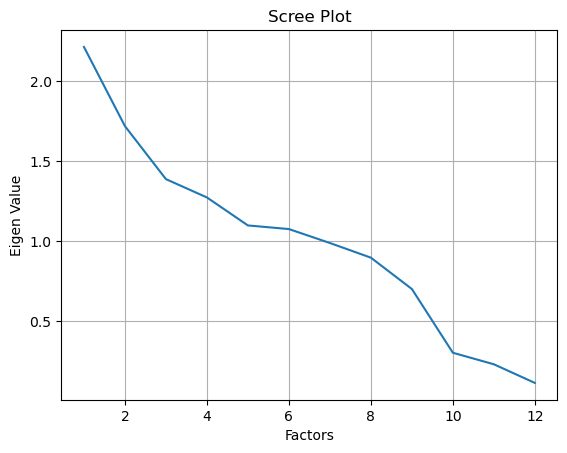

In [12]:
plt.plot(range(1,x.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigen Value')
plt.grid()

**NOTE:** Values close to -1 or 1 indicate that the factor has an influence on these variables. 

In [13]:
NF = 3
c = ['Industrial_structure', 'Administrative_characteristics','Physical characteristics']
#NF = 2
#c = ['Physical characteristics','Industrial_structure']


fa = FactorAnalyzer(n_factors=3,rotation='varimax')
fa.fit(x)
pd.DataFrame(fa.loadings_,index=x.columns).to_csv('varimax.csv')
pd.DataFrame(fa.loadings_,index=x.columns)

,0,1,2
AGRICOLTURE,-0.195734,-0.059741,-0.056292
REAL ESTATE,-0.000679,-0.011572,-0.095564
HOSPITALITY,-0.240597,-0.034120,0.033232
MANUFACTURING,0.857920,-0.191249,0.547953
TECH SERVICES,0.062716,0.723731,0.012270
WHOLE/RETAIL SALES,-0.087962,0.031949,-0.298983
CONSTRUCTIONS,-0.312732,-0.054663,0.032940
BUSINESS SUPPORT SERVICES,0.003500,0.093462,-0.164641
COMMUNICATION AND INFORMATION SERV.,0.181693,0.980246,-0.048280
LOGISTICS,0.049914,-0.025429,-0.191876


In [14]:
fa.get_communalities()

array([0.04504968, 0.00926692, 0.06015547, 1.07285438, 0.52787029,
       0.09814876, 0.1018746 , 0.03585393, 0.99622646, 0.03995437,
       0.95534512, 0.49122682])

In [15]:
x.columns

Index(['AGRICOLTURE', 'REAL ESTATE', 'HOSPITALITY', 'MANUFACTURING',
       'TECH SERVICES', 'WHOLE/RETAIL SALES', 'CONSTRUCTIONS',
       'BUSINESS SUPPORT SERVICES', 'COMMUNICATION AND INFORMATION SERV.',
       'LOGISTICS', 'ALT_MED', 'DISTANCE FROM EPICENTER'],
      dtype='object')

In [16]:

new_var = pd.DataFrame(fa.fit_transform(x), columns=c, index=xy.Comune)
new_var

,Industrial_structure,Administrative_characteristics,Physical characteristics
Comune,,,
Accumoli,-1.488909,0.059048,0.666177
Acquasanta Terme,-0.121880,-0.277978,0.760265
Amandola,0.164649,1.670634,-0.212683
Amatrice,-1.364557,-0.041292,0.686673
Antrodoco,-0.659559,-0.076143,1.531541
...,...,...,...
Ussita,0.322194,-0.236088,2.936236
Valle Castellana,0.282160,-0.197619,2.048469
Vallo di Nera,-1.260302,-0.112730,-0.042828


In [17]:
from sklearn.cluster import KMeans
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import AgglomerativeClustering

In [18]:
#model = KMeans(n_clusters=3)
#model = AffinityPropagation(damping=0.5)
model = AgglomerativeClustering(n_clusters=3)
yhat = model.fit_predict(new_var)
# retrieve unique clusters
clusters = np.unique(yhat)
new_var['cluster'] = yhat
new_var['target'] = y.values
new_var[new_var.cluster == 0] = 3
new_var_ = new_var.reset_index()
new_var_[['cluster', 'target']].groupby('cluster').describe()

target                                                         \
         count       mean        std        min        25%        50%   
cluster                                                                 
1         73.0  -5.226475  11.094438 -30.675977 -12.974860  -4.382508   
2          1.0 -36.919963        NaN -36.919963 -36.919963 -36.919963   
3         48.0   3.000000   0.000000   3.000000   3.000000   3.000000   

                               
               75%        max  
cluster                        
1         2.748728  30.609721  
2       -36.919963 -36.919963  
3         3.000000   3.000000

<AxesSubplot:>

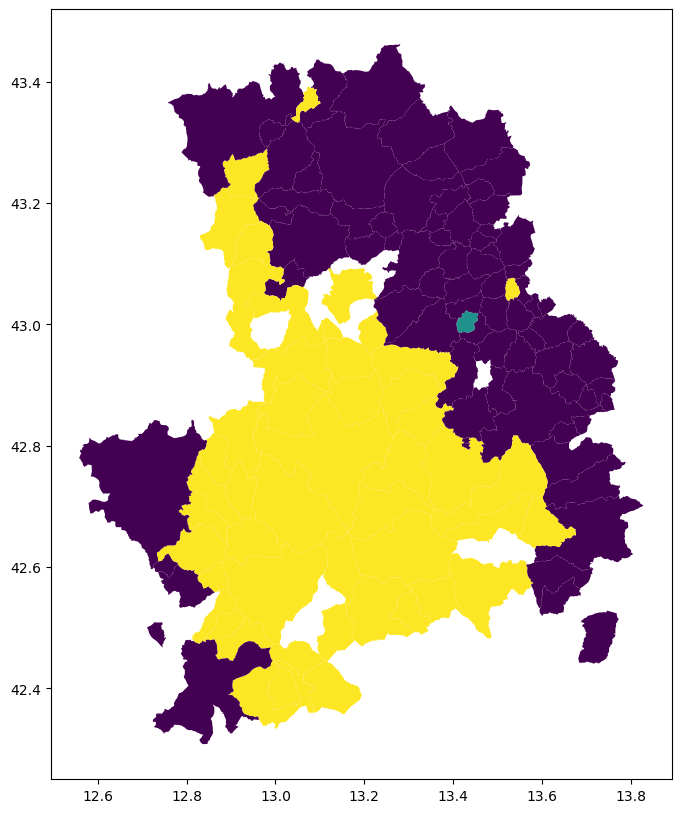

In [19]:
mymap = gpd.read_file('quake_data/Comuni2016/Com01012016_WGS84.shp',encoding='utf-8').to_crs('epsg:4326')
plt.rcParams["figure.figsize"] = (10, 10)
new_var_.columns = ['COMUNE']+c+['cluster','target']
mymap = mymap.merge(new_var_,how='right')
mymap.plot(column='cluster')
#ax.set_ylim(41.8, 44)
#ax.set_xlim(11, 15)